In [1]:
# Commented out IPython magic to ensure Python compatibility.
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.io import wavfile
# %matplotlib inline
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import scipy
import sklearn
import pandas as pd
import base64
import wave
import os
import glob
import sklearn.externals
import joblib
from scipy.io.wavfile import read as read_wav
from wave import open as open_wave
from pydub import AudioSegment

C:\Users\Ajinkya\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\Ajinkya\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Gather all paths from dataset

In [2]:
Pathes=["C:/Users/Ajinkya/Downloads/Voice Authentication Project/AJ2/",
"C:/Users/Ajinkya/Downloads/Voice Authentication Project/Imposter/",
"C:/Users/Ajinkya/Downloads/Voice Authentication Project/Ruby/",
"C:/Users/Ajinkya/Downloads/Voice Authentication Project/Twinkle/",
"C:/Users/Ajinkya/Downloads/Voice Authentication Project/Prakat/"]

wavs=[]
audio_list= []
for i in range(len(Pathes)):
    temp_list=[]
    temp_audio_list=[]
    filename = ''
    for filename in glob.glob(Pathes[i]+"*.wav"):
        temp_audio_list.append(filename)
        temp_list.append(read_wav(filename))
    wavs.append(temp_list)
    audio_list.append(temp_audio_list)

# Creating features table

In [3]:
data=np.zeros([200,21]);
featuredf  = pd.DataFrame(data, columns = ['User', 'Average', 'std', 'zcr', 'centroid', 'rollof', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14','label'])
featuredf.iloc[0:40,0]='AJ';
featuredf.iloc[40:80,0]='Imposter';
featuredf.iloc[80:120,0]='Imposter2';
featuredf.iloc[120:160,0]='Imposter3';
featuredf.iloc[160:200,0]='Imposter4';
featuredf.iloc[0:40,-1]=1;
featuredf.iloc[40:80,-1]=0;
featuredf.iloc[80:120,-1]=0;
featuredf.iloc[120:160,-1]=0;
featuredf.iloc[160:200,-1]=0;

# Sampling rate

In [4]:
sample_names=["AJ (1).wav", "Imposter (1).wav","Ruby (1).wav","Twinkle (1).wav","Prakat (1).wav"]
srs=[]

for i in range(len(Pathes)):
    AJ = os.chdir(Pathes[i])
    sr, x=read_wav(sample_names[i])
    srs.append(sr)
srs

[48000, 44100, 48000, 44100, 48000]

# Normalization of datasets(amplitudes) 

In [5]:
def normalize(x1, axis=0):
    return sklearn.preprocessing.minmax_scale(x1, axis=axis)

# User's - combined graph of all samples

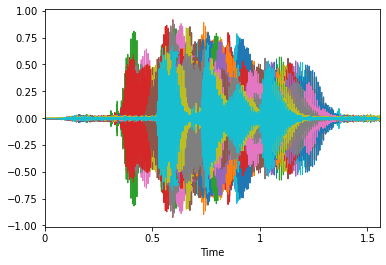

In [6]:
pathAudio = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Prakat/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y,mono = True)   
    data = data[0]     
    librosa.display.waveplot(data)

# Feature Extraction

In [7]:
def feature_extraction(audio_list_element,featuredf,sr,ind_init):
    ind=ind_init;
    for audio in audio_list_element:
        data,sample_rate=librosa.load(audio)
        zero_crossings = librosa.zero_crossings(data, pad=False) 
        spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
        spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
        mfccs = librosa.feature.mfcc(data, sr=sr,n_mfcc=14)
        featuredf.iloc[ind,1]=np.mean(data)
        featuredf.iloc[ind,2]=np.std(data)
    #Spectral Centroid
        featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids))
    #Zero Crossings
        featuredf.iloc[ind,3]=sum(zero_crossings)
    #Spectral Rolloff
        featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff))
    #mfcc
        featuredf.iloc[ind,6:20]=np.mean(mfccs,1)
        ind=ind+1;

ind_init=0
for i in range(len(Pathes)):
    feature_extraction(audio_list[i],featuredf,srs[i],ind_init)
    ind_init=ind_init+40

In [8]:
featuredf.to_csv("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Feature_Extraction_Final.csv", header=True, index=False)

# Classification

In [9]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import classification_report;
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [10]:
y=featuredf.label
x=featuredf.drop(['label','User'],axis=1)
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(200, 19)
(200,)
(160, 19) (160,)
(40, 19) (40,)


# Logistic Regression

ACC:1.000
AUC:1.000

Test confusion matrix: Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



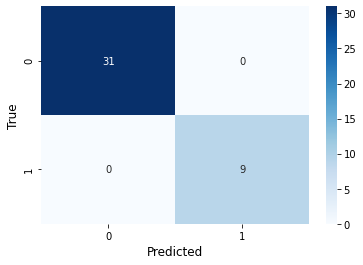

In [11]:
logreg = LogisticRegression();
logreg.fit(x_train,y_train);
y_pred = logreg.predict(x_test);
cf_matrix = confusion_matrix(y_test, y_pred);
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion matrix: Logistic Regression")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

# Support Vector Machine

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



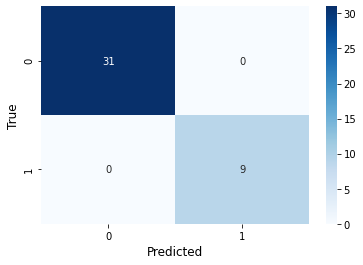

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
clSvm = SVC(kernel = 'linear') 
p = {'kernel':('linear',), 'C':[0.001,0.1,1,10]}
clSvm= GridSearchCV(clSvm, p,cv = KFold(4))
clSvm.fit(x_train, y_train )
y_pred = clSvm.predict(x_test)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

# NaïveBayes

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



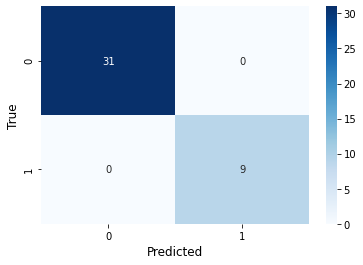

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# Decision Tree

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



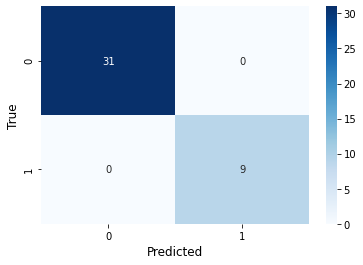

In [14]:
from sklearn.tree import DecisionTreeClassifier;
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# KNN

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



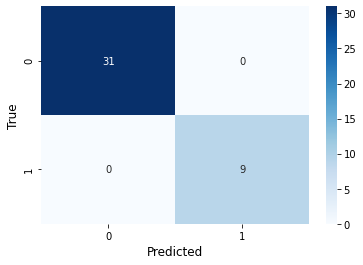

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(x_train, y_train)
y_pred = knnclf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

In [20]:
"""# Save and Load Model Using joblib"""

filename='final_model_copy2.sav'
joblib.dump(logreg, filename)

loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

1.0
